In [ ]:
#2021, Ting Sun
#Myelin mutant scRAN-seq data
#Microglia subset

#merging with external datasets

#in house: Myelin mutant microglia profile

#mouse
#AD: Zhou 2020 7-month (5xFAD)

#human
#AD: Zhou 2020, Mathys 2019


###############after mathys 2019 dataset meta.data cleaning

#run under sc_env

In [1]:
#for scRNA-seq objects
library(Seurat)
library(dplyr)
library(Matrix)
library(abind)
library(sctransform)

#for parallelization
library(future)
library(future.apply)

#for visualization
library(cowplot)
library(ggplot2)

#for DGE analysis
library(DESeq2)
library(MAST)
library(patchwork)
library(pheatmap)

#trajectory analysis
library(scater)
library(slingshot)
library(ggbeeswarm)

#support general object transfer
library(SingleCellExperiment)

#normally unnecessary, for loading sparse matrix
#library(DropSeq.util)

#ABA spatial map
library(voxhunt)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:Matrix’:

    which

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.

In [3]:
#read in source data
mouse<-readRDS("./MyelinMutant_scRNAseq_Zhou_Microglia_raw_HUMANgene_TRANSLATED.rds")

#Zhou et.al 2020
zhou<-readRDS("./SYN21125841_Human_Zhou_MarcoColonna_NatMed_2020_AD_snRNA_microglia_scaled.rds")

#Mathys et.al 2019
mathys<-readRDS("./SYB18485175_Human_Mathys_Tsai_Nature_2019_AD_snRNA_filter_scaled.rds")

In [6]:
#meta.data organization and clean up
#remaining tags: 
#orig.ident, nCount_RNA, nFeature_RNA, percent.mt, CellType, SampleID, Genotype, Age, Tissue, Study, Sex


In [15]:
#dataset merging
obj<-list(mouse, zhou, mathys)

In [16]:
mic<-merge(x = obj[[1]], y = c(obj[2:3]), project = "Depp_Sun2021")

In [17]:
mic
head(mic@meta.data)

An object of class Seurat 
51455 features across 12688 samples within 1 assay 
Active assay: RNA (51455 features, 0 variable features)

orig.ident nCount_RNA nFeature_RNA Condition SampleID
WT1_AAACCCAAGTGGATAT-1 1T         1282        945         WT        WT1     
WT1_AACAGGGCACCAAAGG-1 1T         1175        890         WT        WT1     
WT1_AAGTACCCACCTGCAG-1 1T         1214        924         WT        WT1     
WT1_AAGTGAAGTTCCGTTC-1 1T         1552       1115         WT        WT1     
WT1_AATCGACAGAACTCCT-1 1T         1371       1025         WT        WT1     
WT1_ACACCAACAATGACCT-1 1T         1549       1089         WT        WT1     
                       percent.mt CellType    Tissue        Age Study         ⋯
WT1_AAACCCAAGTGGATAT-1 0          Homeostatic CC and Cortex 3m  Myelin mutant ⋯
WT1_AACAGGGCACCAAAGG-1 0          Homeostatic CC and Cortex 3m  Myelin mutant ⋯
WT1_AAGTACCCACCTGCAG-1 0          Homeostatic CC and Cortex 3m  Myelin mutant ⋯
WT1_AAGTGAAGTTCCGTTC-1 0          Homeostatic CC and Cortex 3m  Myelin mutant ⋯
WT1_AATCGACAGAACTCCT-1 0          Homeostatic CC and Cortex 3m  Myelin mutant ⋯
WT1_ACACCAACAATGACCT-1 0          Homeostatic CC and Cortex 3m  Myelin mutant ⋯
                       Study_Genotype   integrated_snn_res.0.2 seurat_clusters
WT1_AAACCCAAGTGGATAT-1 Myelin mutant_WT 0                      0              
WT1_AACAGGGCACCAAAGG-1 Myelin mutant_WT 2                      2              
WT1_AAGTACCCACCTGCAG-1 Myelin mutant_WT 0                      0              
WT1_AAGTGAAGTTCCGTTC-1 Myelin mutant_WT 2                      2              
WT1_AATCGACAGAACTCCT-1 Myelin mutant_WT 0                      0              
WT1_ACACCAACAATGACCT-1 Myelin mutant_WT 0                      0              
                       CellType_redefine integrated_snn_res.0.3 Species
WT1_AAACCCAAGTGGATAT-1 microglia1        5                      Mouse  
WT1_AACAGGGCACCAAAGG-1 microglia2        2                      Mouse  
WT1_AAGTACCCACCTGCAG-1 microglia1        0                      Mouse  
WT1_AAGTGAAGTTCCGTTC-1 microglia2        2                      Mouse  
WT1_AATCGACAGAACTCCT-1 microglia1        0                      Mouse  
WT1_ACACCAACAATGACCT-1 microglia1        0                      Mouse  
                       original_patientID CDR APOE_genotype AD_onset
WT1_AAACCCAAGTGGATAT-1 NA                 NA  NA            NA      
WT1_AACAGGGCACCAAAGG-1 NA                 NA  NA            NA      
WT1_AAGTACCCACCTGCAG-1 NA                 NA  NA            NA      
WT1_AAGTGAAGTTCCGTTC-1 NA                 NA  NA            NA      
WT1_AATCGACAGAACTCCT-1 NA                 NA  NA            NA      
WT1_ACACCAACAATGACCT-1 NA                 NA  NA            NA

In [18]:
#check all meta.data entries

In [19]:
for(i in c(4,5,7,8,9,10)){
    print(unique(mic@meta.data[,i]))
}

 [1] "WT"            "CnpKO"         "Plp1KO"        "Foxg1MbpKO"   
 [5] "Trem2KO"       "5xFAD"         "Trem2KO_5xFAD" "AD"           
 [9] "Ctrl"          "AD_TREM2_R62H"
 [1] "WT1"            "CnpKO1"         "Plp1KO1"        "Foxg1MbpKO1"   
 [5] "WT2"            "CnpKO2"         "Plp1KO2"        "Foxg1MbpKO2"   
 [9] "WT3"            "Trem2KO1"       "Trem2KO2"       "Trem2KO3"      
[13] "WT_5xFAD1"      "WT_5xFAD2"      "WT_5xFAD3"      "Trem2KO_5xFAD1"
[17] "Trem2KO_5xFAD2" "Trem2KO_5xFAD3" "AD1"            "AD10"          
[21] "AD11"           "AD12"           "AD13"           "AD2"           
[25] "AD3"            "AD5"            "AD7"            "AD8"           
[29] "AD9"            "C1"             "C11"            "C12"           
[33] "C2"             "C3"             "C4"             "C5"            
[37] "C6"             "C7"             "C8"             "C9"            
[41] "P10"            "P11"            "P12"            "P13"           
[45] "P2"             

In [20]:
table(mic@meta.data$Study, mic@meta.data$Species)

               
                Human Mouse
  Mathys2019     1917     0
  Myelin mutant     0  1898
  Zhou2020       4769  4104

In [21]:
mic@meta.data$Condition[which(mic@meta.data$Condition =="AD")]<-paste0("AD_",
                                                                       mic@meta.data$Study[which(mic@meta.data$Condition=="AD")])

mic@meta.data$Condition[which(mic@meta.data$Condition =="Ctrl")]<-paste0("Ctrl_",
                                                                         mic@meta.data$Study[which(mic@meta.data$Condition=="Ctrl")])

Centering and scaling data matrix
PC_ 1 
Positive:  NEAT1, CD74, SPP1, MT-CO2, MT-CO1, MT-ND3, FTL, MT-ATP6, MT-CO3, XIST 
	   MT-ND4, MT-CYB, HSPA1A, HLA-DRB1, HLA-B, MT-ND2, MT-ND1, HLA-DRA, VSIG4, MT-ND4L 
	   SCIN, HSPA1B, GAPDH, C10orf11, RPL13, HIST1H2AC, MT-ND5, TMSB10, FCGBP, HAMP 
Negative:  PTPRD, SNHG11, CSMD1, MEG3, LRP1B, DLG2, MAGI2, NKAIN2, KCNIP4, CADM2 
	   NRXN3, PCDH9, OPCML, MDGA2, NRXN1, NLGN1, ADGRB3, LSAMP, GRM7, PHACTR1 
	   ANKS1B, LINGO2, CSMD3, LRRC7, GM42418, ANK2, IL1RAPL1, NRG3, DLGAP1, RBFOX1 
PC_ 2 
Positive:  ST18, MOBP, MOG, PHLDB1, PLEKHH1, ASPA, CLMN, UGT8, MYRF, ZNF536 
	   FA2H, DAAM2, CNTN2, MAP7, BCAS1, MBP, SEC14L5, ARHGAP23, MIR219A2, HAPLN2 
	   MAG, CDH19, ANLN, ERBB3, SEPT4, AATK, CERCAM, CLDN11, TTLL7, EDIL3 
Negative:  MEG3, GM26917, SNHG11, CTSD.1, MIR124A-1HG, GM45159, ATP1A3, GM42418, GAPDH.1, CX3CL1 
	   GM27000, AC149090.1, TSPOAP1, PTPN5, C230004F18RIK, GM27032, CAMKV, ADD2, KCNQ2, ELMOD1 
	   DBN1, RNF112, ARPP21, TMEM191B, SORBS2, 

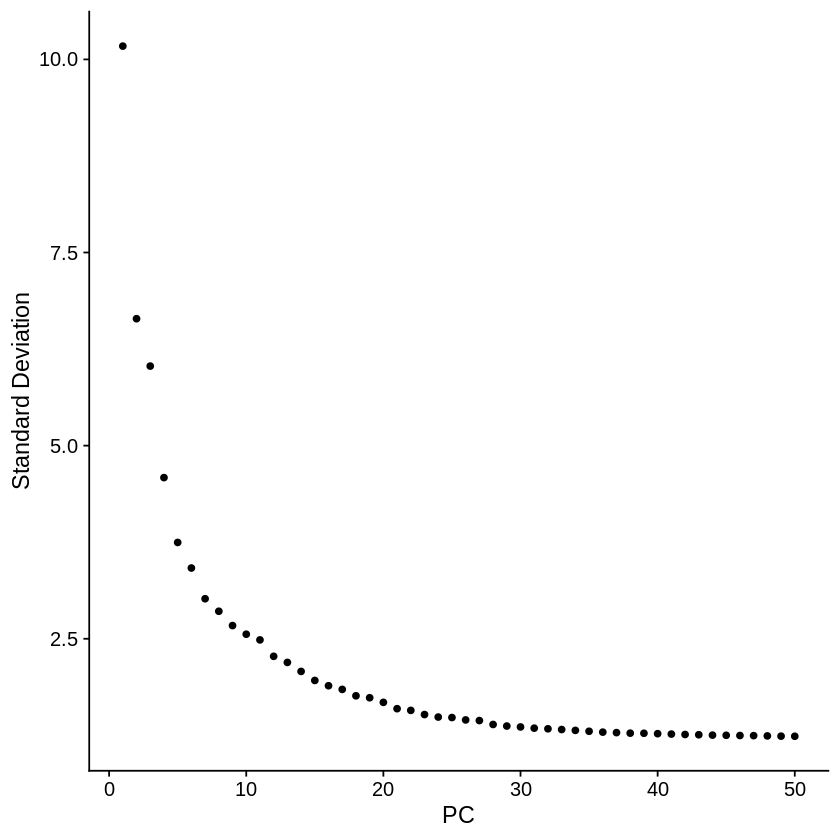

In [23]:
#primary embedding analysis
#detect potential batch effect
#one step normalisation until PCA embedding
DefaultAssay(mic)<-"RNA"

mic<-NormalizeData(mic)

mic<-FindVariableFeatures(mic, selection.method = 'vst',
                            nfeatures = 2000)

all.genes <- rownames(mic)
mic <- ScaleData(mic, features = all.genes)

mic<-RunPCA(mic, features = VariableFeatures(object = mic))
ElbowPlot(mic, ndims = 50)

In [24]:
mic<-RunUMAP(mic, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”14:33:57 UMAP embedding parameters a = 0.9922 b = 1.112
14:33:57 Read 12688 rows and found 30 numeric columns
14:33:57 Using Annoy for neighbor search, n_neighbors = 30
14:33:57 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
14:34:00 Writing NN index file to temp file /tmp/RtmpPfSTXL/file9535276698d93
14:34:00 Searching Annoy index using 1 thread, search_k = 3000
14:34:04 Annoy recall = 100%
14:34:05 Commencing smooth kNN distance calibration using 1 thread
14:34:08 Initializing from normalized Laplacian + noise
14:34:09 Commencing optimizat

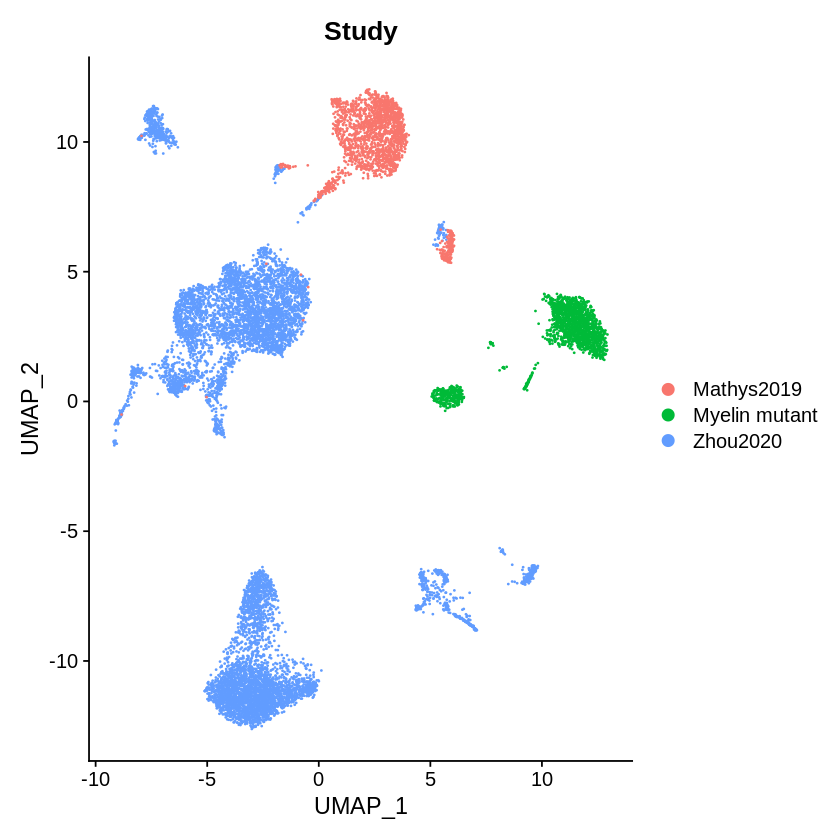

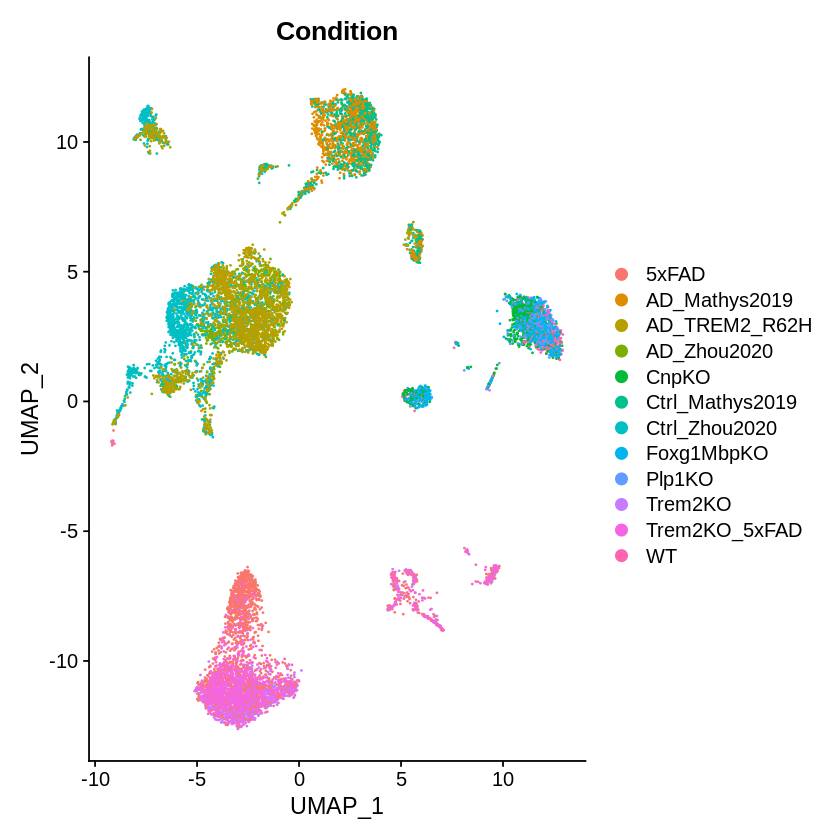

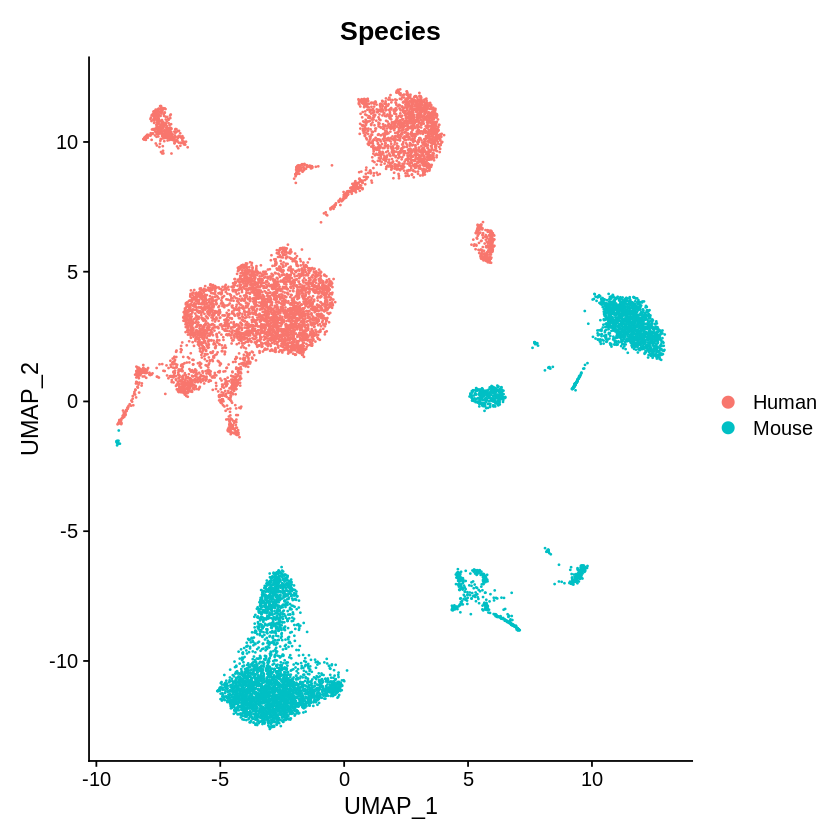

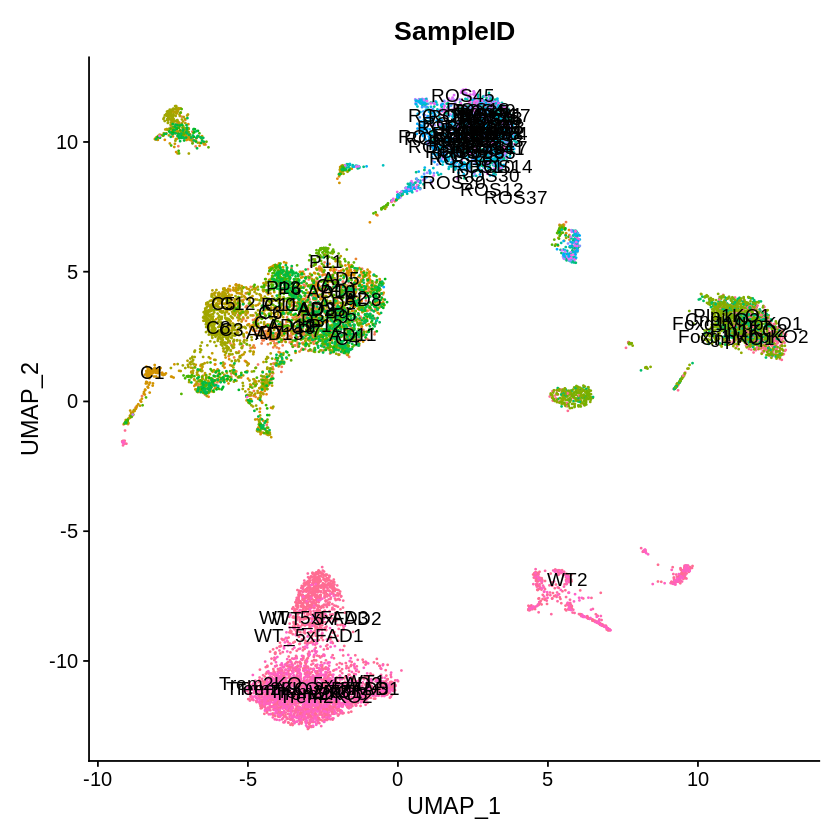

In [25]:
DimPlot(mic, group.by = "Study")
DimPlot(mic, group.by = "Condition")
DimPlot(mic, group.by = "Species")
DimPlot(mic, group.by = "SampleID", label = T)+NoLegend()

#preare to correct study and sequnecing batch effects

In [29]:
#seperate batch 1 and batch2 from myelin mutant data before processing with integration pipeline
mic@meta.data$batch<-mic@meta.data$Study

mic@meta.data$batch[which(mic@meta.data$Study == "Myelin mutant")]<-mic@meta.data$SampleID[which(mic@meta.data$Study == "Myelin mutant")]

unique(mic@meta.data$batch)

[1] "WT1"         "CnpKO1"      "Plp1KO1"     "Foxg1MbpKO1" "WT2"        
 [6] "CnpKO2"      "Plp1KO2"     "Foxg1MbpKO2" "Zhou2020"    "Mathys2019"

In [30]:
mic@meta.data$batch<-factor(mic@meta.data$batch,
                           levels = unique(mic@meta.data$batch),
                           labels = c(rep("batch1",4), rep("batch2",4),"Zhou2020","Mathys2019"))
unique(mic@meta.data$batch)

[1] batch1     batch2     Zhou2020   Mathys2019
Levels: batch1 batch2 Zhou2020 Mathys2019

In [31]:
mic@meta.data$batch<-paste0(mic@meta.data$batch,mic@meta.data$Species)

unique(mic@meta.data$batch)

[1] "batch1Mouse"     "batch2Mouse"     "Zhou2020Mouse"   "Zhou2020Human"  
[5] "Mathys2019Human"

In [32]:
table(mic@meta.data$batch)


    batch1Mouse     batch2Mouse Mathys2019Human   Zhou2020Human   Zhou2020Mouse 
            991             907            1917            4769            4104 

In [34]:
#prepare to correct for sample batch effect
#SCTranform pipeline

DefaultAssay(mic)<-"RNA"
seu.list<-SplitObject(mic, split.by = "batch")

for (k in c(1:length(seu.list))) {
    seu.list[[k]] <- SCTransform(seu.list[[k]], verbose = TRUE)
}

seu.features <- SelectIntegrationFeatures(object.list = seu.list, nfeatures = 500)
seu.list <- PrepSCTIntegration(object.list = seu.list, anchor.features = seu.features)

seu.anchors <- FindIntegrationAnchors(object.list = seu.list, normalization.method = "SCT", 
                                        anchor.features = seu.features, 
                                      k.filter = 300)

seu.integrated <- IntegrateData(anchorset = seu.anchors, normalization.method = "SCT")

Calculating cell attributes from input UMI matrix: log_umi
Variance stabilizing transformation of count matrix of size 13569 by 991
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 2000 genes, 991 cells


  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |======================================================================| 100%


Found 109 outliers - those will be ignored in fitting/regularization step

Second step: Get residuals using fitted parameters for 13569 genes


  |======================================================================| 100%


Computing corrected count matrix for 13569 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 29.23817 secs
Determine variable features
Set 3000 variable features
Place corrected count matrix in counts slot
Centering data matrix
Set default assay to SCT
Calculating cell attributes from input UMI matrix: log_umi
Variance stabilizing transformation of count matrix of size 13903 by 907
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 2000 genes, 907 cells


  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |======================================================================| 100%


Found 69 outliers - those will be ignored in fitting/regularization step

Second step: Get residuals using fitted parameters for 13903 genes


  |======================================================================| 100%


Computing corrected count matrix for 13903 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 27.43198 secs
Determine variable features
Set 3000 variable features
Place corrected count matrix in counts slot
Centering data matrix
Set default assay to SCT
Calculating cell attributes from input UMI matrix: log_umi
Variance stabilizing transformation of count matrix of size 15721 by 4104
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 2000 genes, 4104 cells


  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |======================================================================| 100%


Found 65 outliers - those will be ignored in fitting/regularization step

Second step: Get residuals using fitted parameters for 15721 genes


  |======================================================================| 100%


Computing corrected count matrix for 15721 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 1.703276 mins
Determine variable features
Set 3000 variable features
Place corrected count matrix in counts slot
Centering data matrix
Set default assay to SCT
Calculating cell attributes from input UMI matrix: log_umi
Variance stabilizing transformation of count matrix of size 17592 by 4769
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 2000 genes, 4769 cells


  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |======================================================================| 100%


Found 63 outliers - those will be ignored in fitting/regularization step

Second step: Get residuals using fitted parameters for 17592 genes


  |======================================================================| 100%


Computing corrected count matrix for 17592 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 2.042764 mins
Determine variable features
Set 3000 variable features
Place corrected count matrix in counts slot
Centering data matrix
Set default assay to SCT
Calculating cell attributes from input UMI matrix: log_umi
Variance stabilizing transformation of count matrix of size 14410 by 1917
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 2000 genes, 1917 cells


  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu =

  |======================================================================| 100%


Found 115 outliers - those will be ignored in fitting/regularization step

Second step: Get residuals using fitted parameters for 14410 genes


  |======================================================================| 100%


Computing corrected count matrix for 14410 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 49.85048 secs
Determine variable features
Set 3000 variable features
Place corrected count matrix in counts slot
Centering data matrix
Set default assay to SCT
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3122 anchors
Filtering anchors
	Retained 2930 anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 4167 anchors
Filtering anchors
	Retained 3120 anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3910 anchors
Filtering anchors
	Retained 2945 anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 4267 anchors
Filtering anchors
	Retained 3176 anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3995 anchors
Filtering anchors
	Retained 2969 anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 10449 anchors
Filtering anchors
	Reta

In [35]:
seu.integrated

An object of class Seurat 
75421 features across 12688 samples within 3 assays 
Active assay: integrated (500 features, 500 variable features)
 2 other assays present: RNA, SCT

In [36]:
seu.integrated <- RunPCA(seu.integrated, verbose = FALSE, npcs = 50)

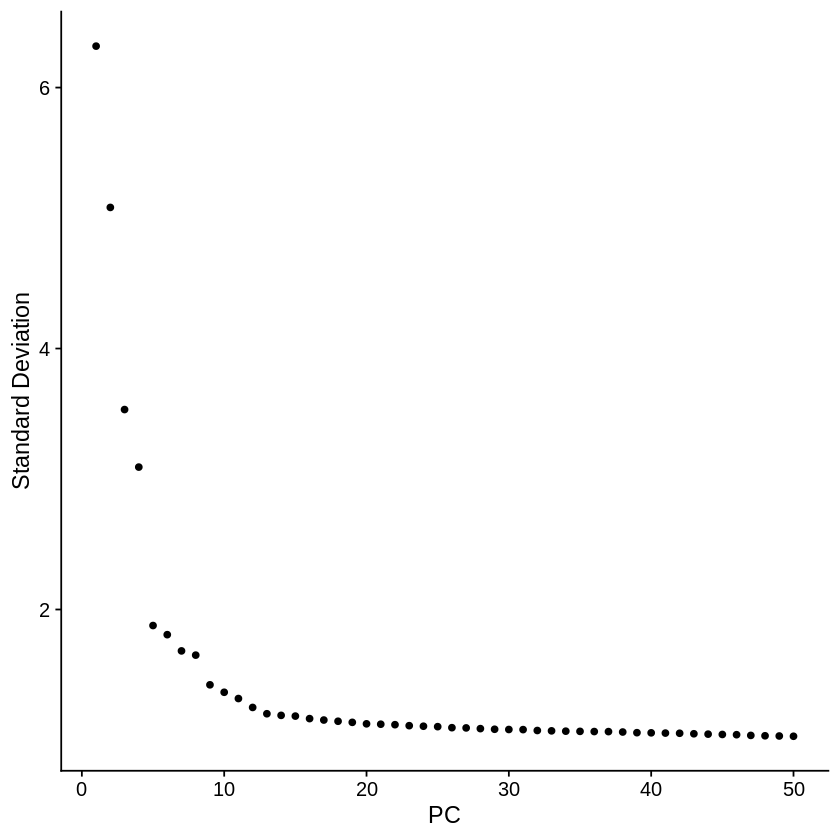

In [37]:
ElbowPlot(seu.integrated, ndims = 50)

In [38]:
seu.integrated <- RunUMAP(seu.integrated, dims = 1:15)

14:47:03 UMAP embedding parameters a = 0.9922 b = 1.112
14:47:03 Read 12688 rows and found 15 numeric columns
14:47:03 Using Annoy for neighbor search, n_neighbors = 30
14:47:03 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
14:47:06 Writing NN index file to temp file /tmp/RtmpPfSTXL/file9535250803d1a
14:47:06 Searching Annoy index using 1 thread, search_k = 3000
14:47:12 Annoy recall = 100%
14:47:13 Commencing smooth kNN distance calibration using 1 thread
14:47:15 Initializing from normalized Laplacian + noise
14:47:16 Commencing optimization for 200 epochs, with 575136 positive edges
14:47:25 Optimization finished


Centering and scaling data matrix


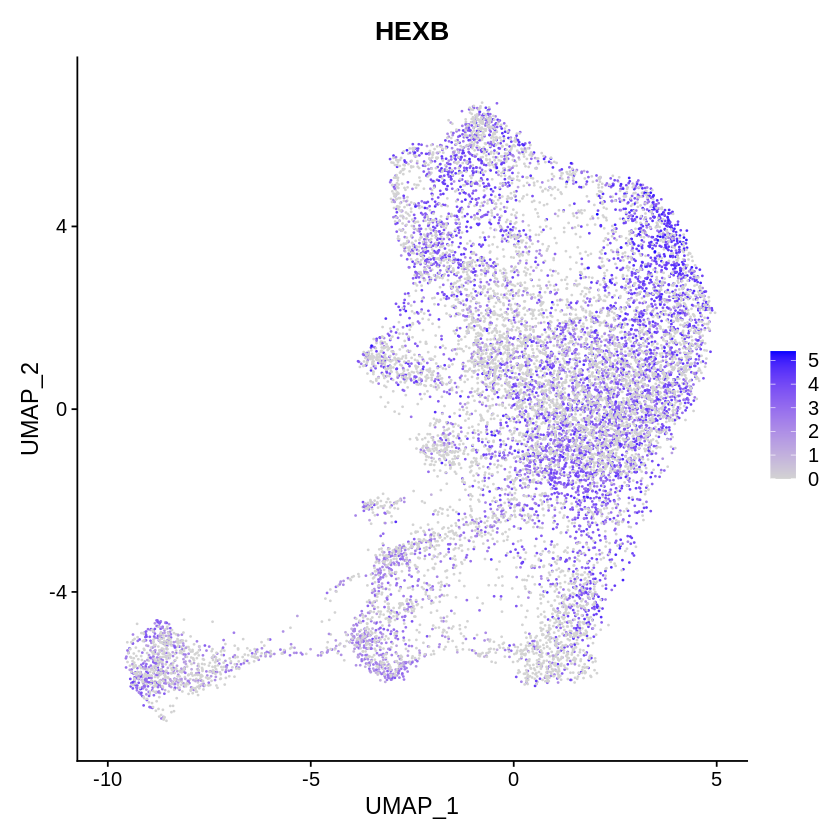

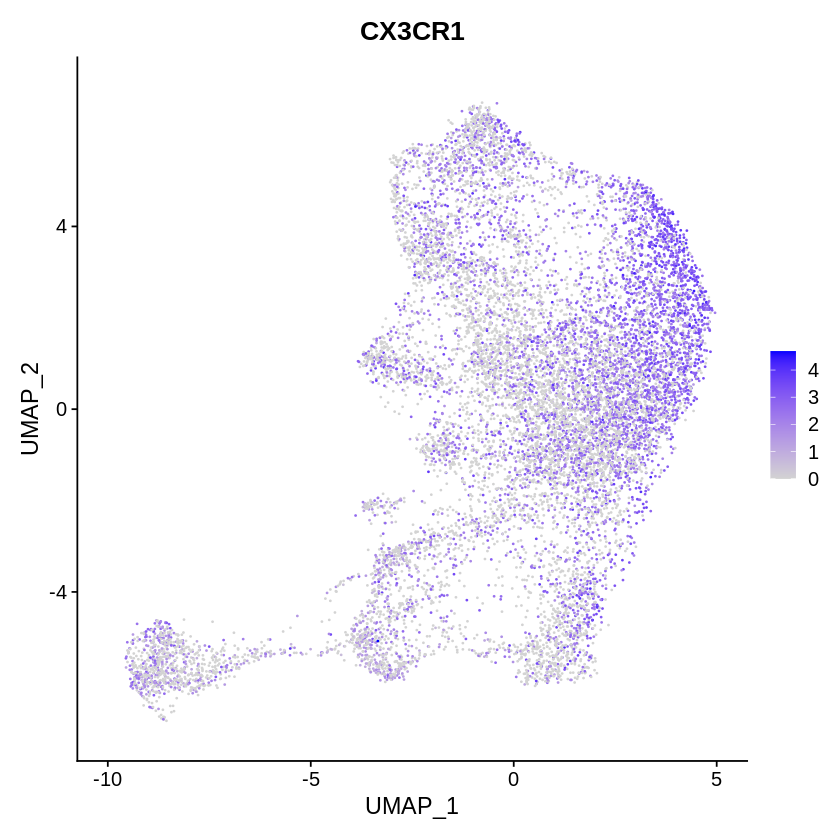

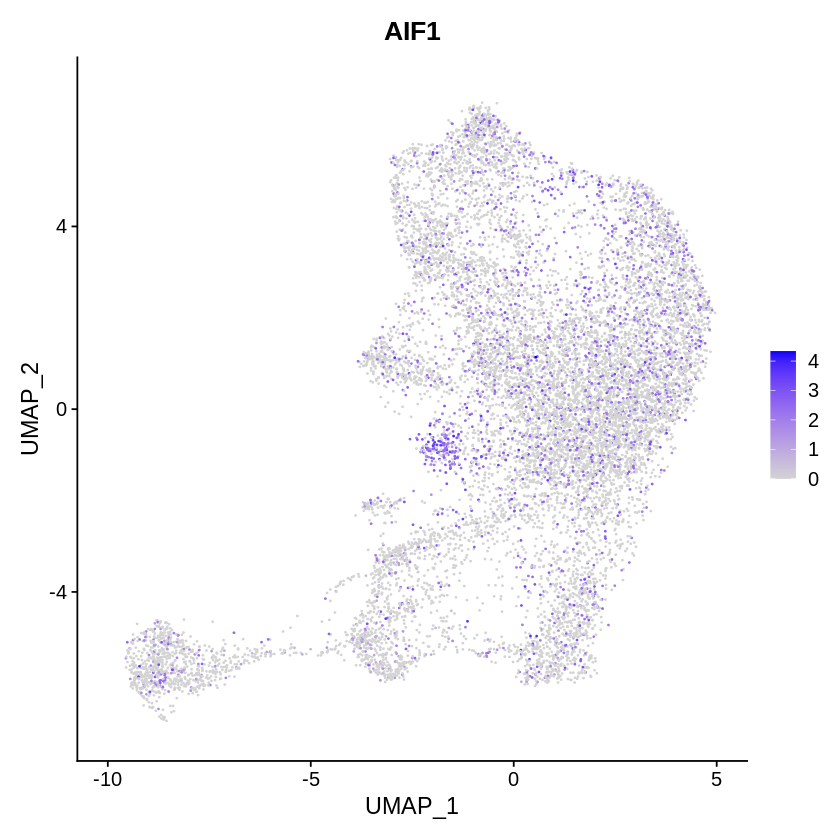

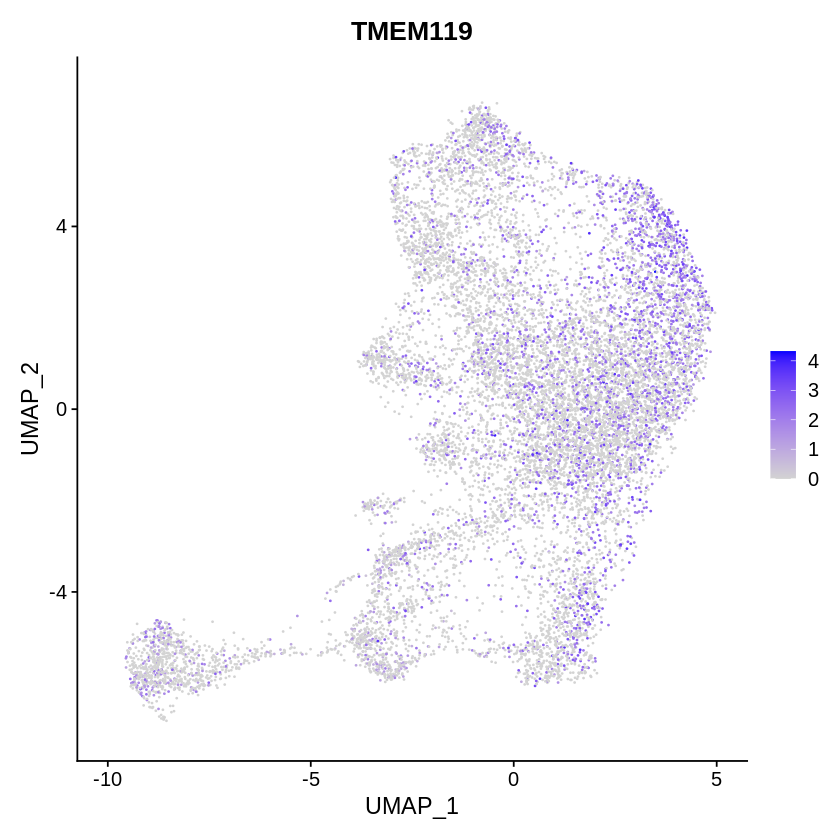

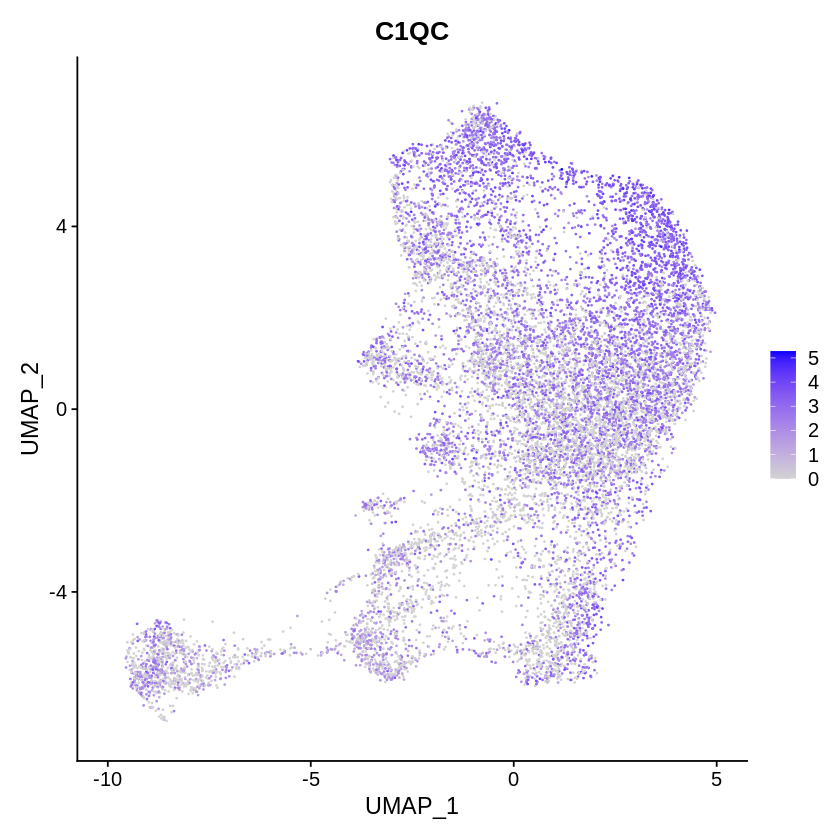

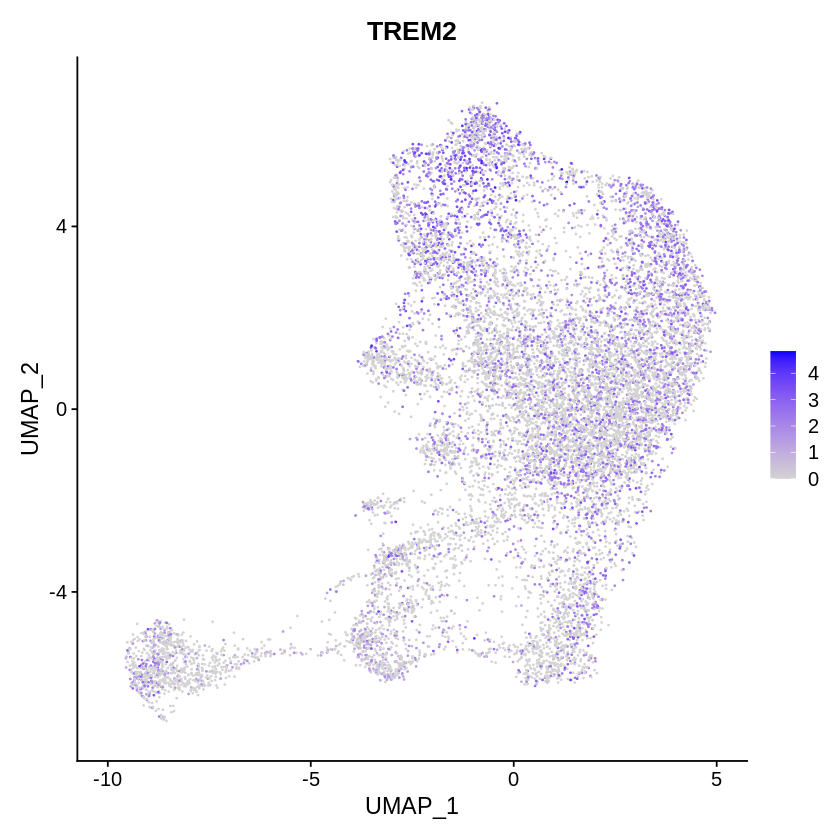

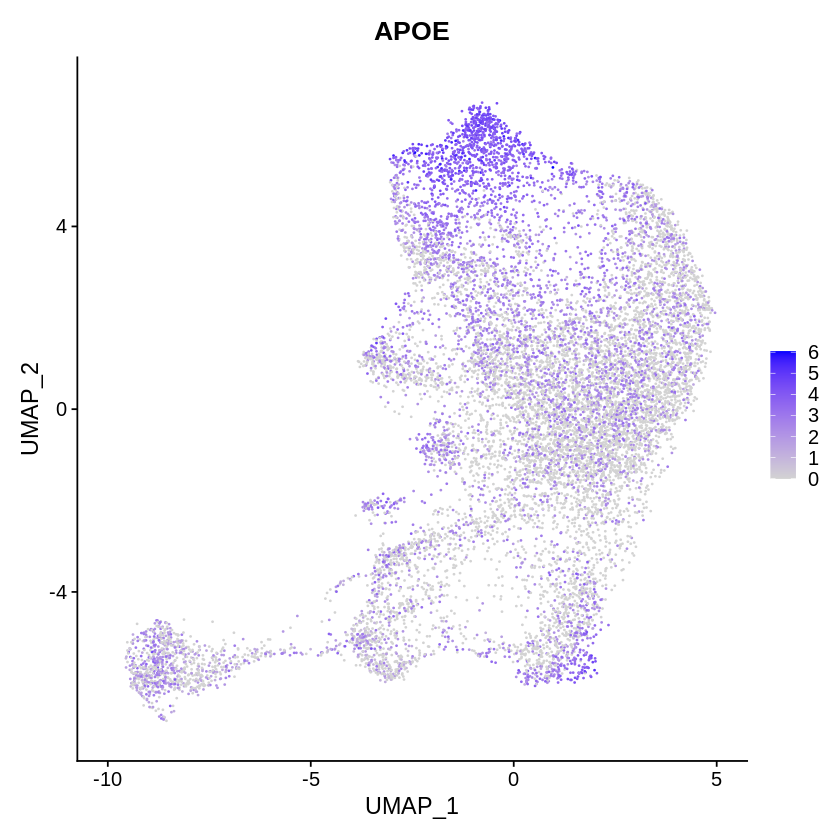

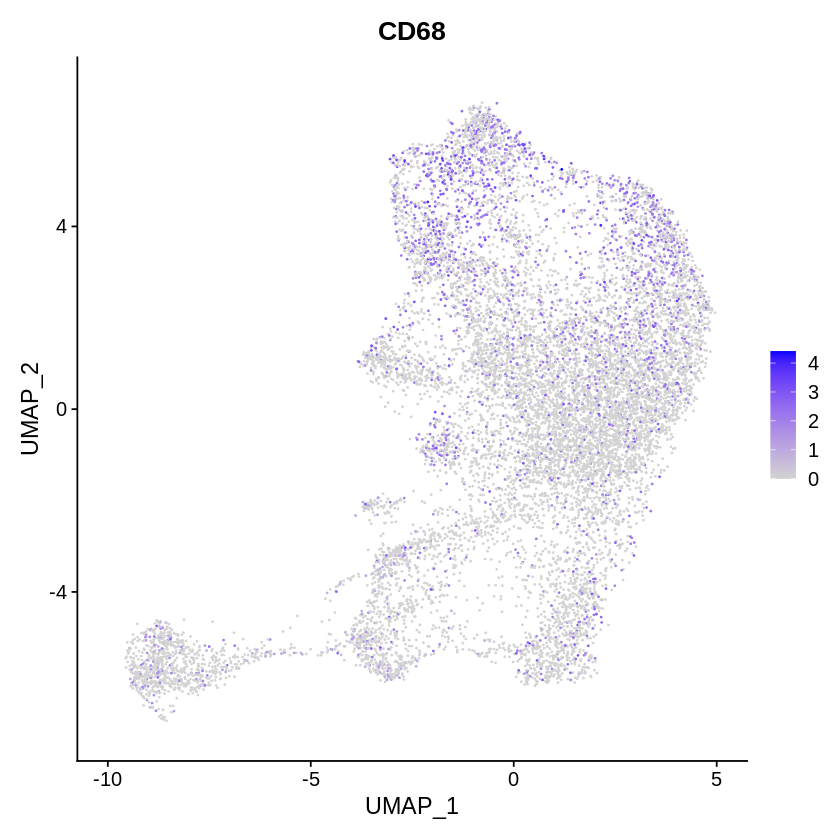

In [39]:
#check for marker gene expression and removal of batch effect

microglia_marker<-c("Hexb","Cx3cr1","Aif1","Tmem119",
                   "C1qc","Trem2","Apoe","Cd68")

microglia_marker<-toupper(microglia_marker)

DefaultAssay(seu.integrated)<-"RNA"
seu.integrated<-NormalizeData(seu.integrated)
all.genes<-rownames(seu.integrated)
seu.integrated<-ScaleData(seu.integrated, features = all.genes)

for(k in microglia_marker){
    print(FeaturePlot(seu.integrated, feature = k))
}

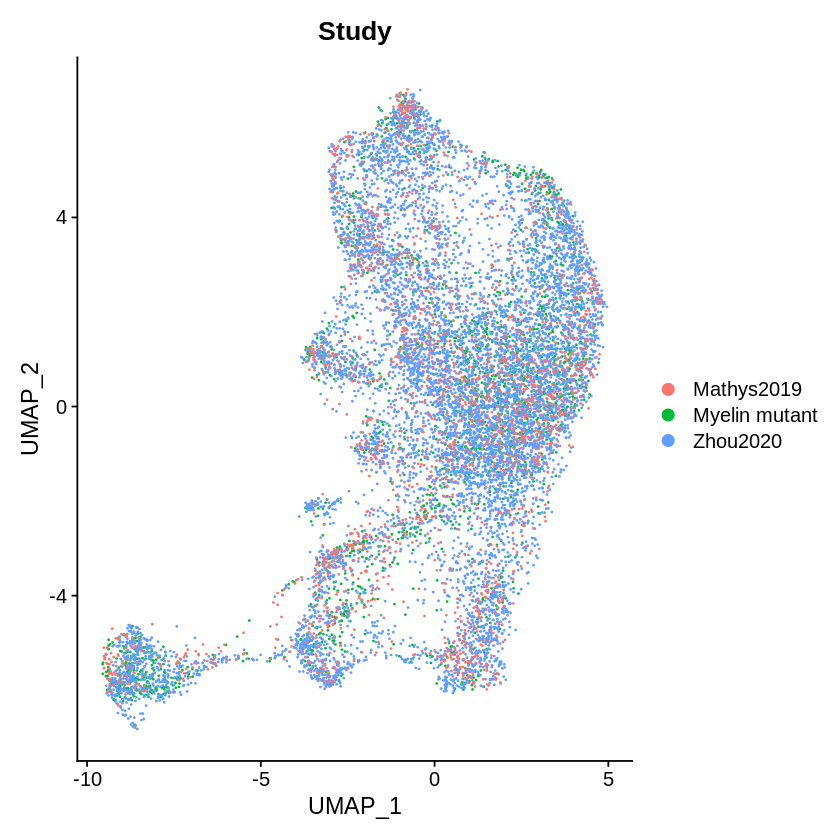

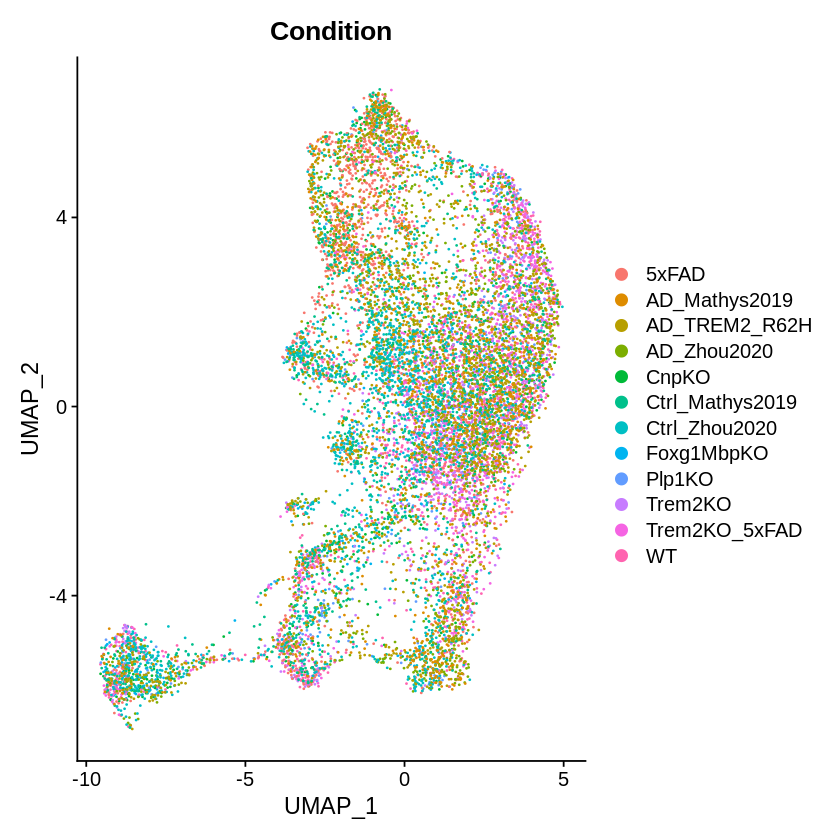

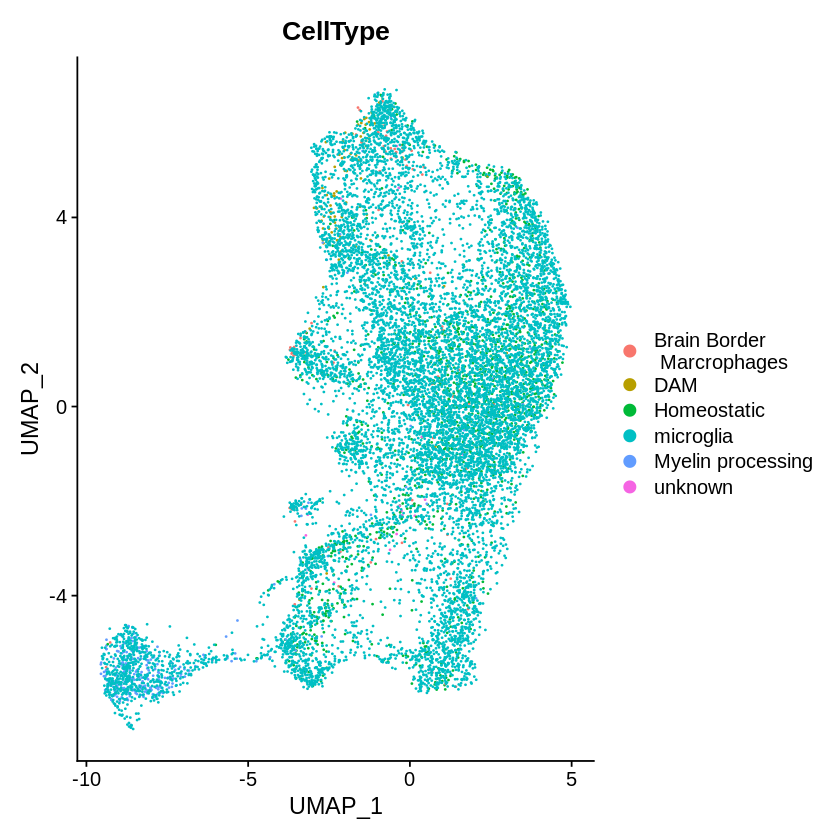

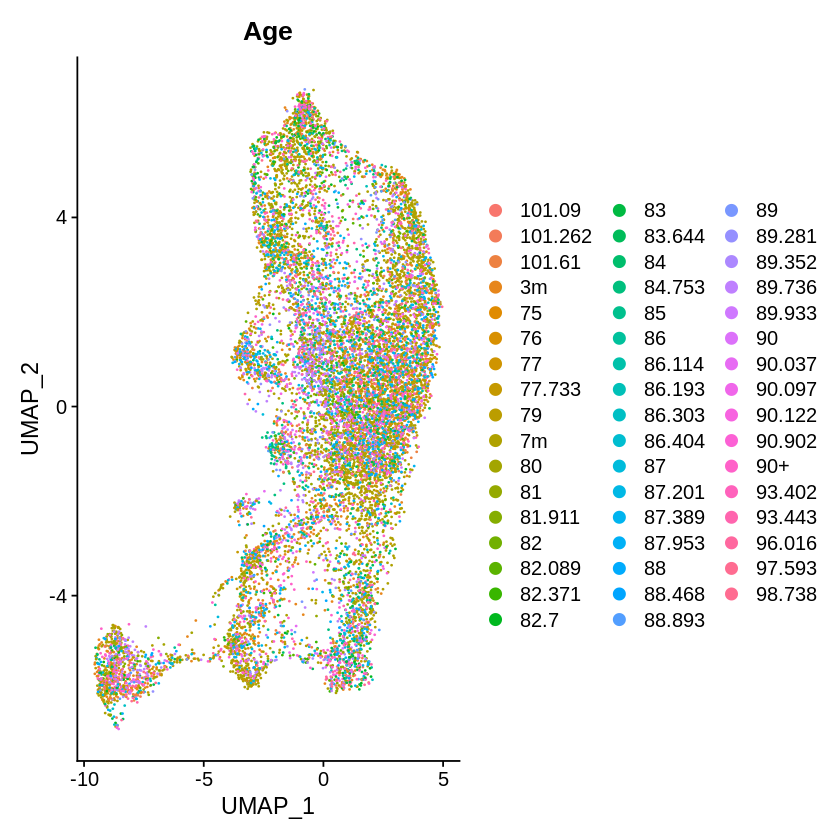

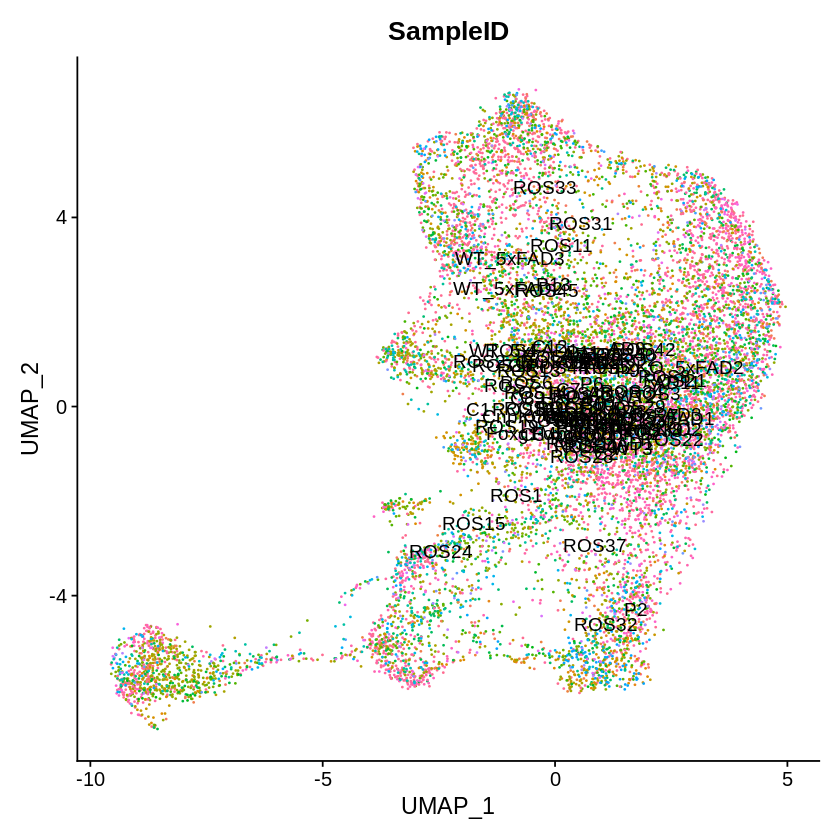

In [40]:
DimPlot(seu.integrated, group.by = "Study")
DimPlot(seu.integrated, group.by = "Condition")
DimPlot(seu.integrated, group.by = "CellType")
DimPlot(seu.integrated, group.by = "Age")
DimPlot(seu.integrated, group.by = "SampleID", label = TRUE)+NoLegend()

In [41]:
#perform clustering

DefaultAssay(seu.integrated)<-"integrated"
seu.integrated<- FindNeighbors(object = seu.integrated, dims = 1:15)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12688
Number of edges: 442227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8543
Number of communities: 11
Elapsed time: 3 seconds



   0    1    2    3    4    5    6    7    8    9   10 
4345 2107 1177 1150  938  891  755  471  421  353   80 

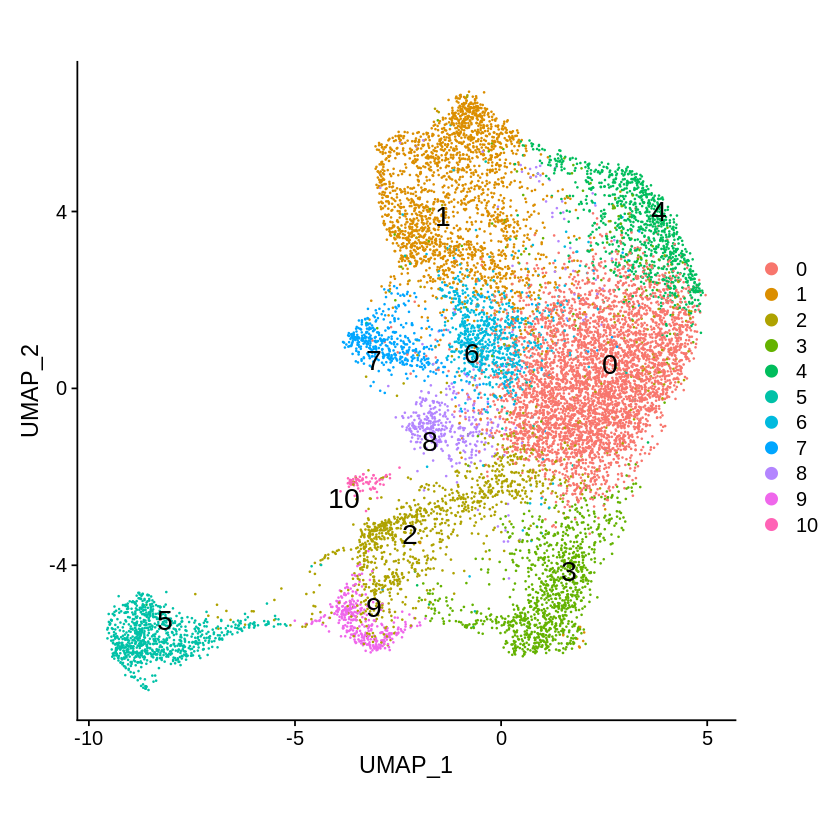

In [42]:
seu.integrated <- FindClusters(object = seu.integrated, resolution = 0.5)
table(Idents(seu.integrated))

DimPlot(object = seu.integrated, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

In [43]:
seu.integrated@meta.data$seurat_clusters<-seu.integrated@meta.data$integrated_snn_res.0.5

In [44]:
#marker gene calculation
DefaultAssay(seu.integrated)<-"RNA"
Idents(seu.integrated)<-"seurat_clusters"

marker_all<-FindAllMarkers(seu.integrated, only.pos = TRUE, min.pct = 0.5, logfc.threshold = 0.25,
                          test.use = "MAST")

Calculating cluster 0
                                                                              
Done!
Combining coefficients and standard errors
Warning message in melt(coefAndCI, as.is = TRUE):
“The melt generic in data.table has been passed a array and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(coefAndCI). In the next version, this warning will become an error.”Calculating log-fold changes
Warning message in melt(lfc):
“The melt generic in data.table has been passed a list and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend th

                                                                              
Done!
Warning message in melt(llrt):
“The melt generic in data.table has been passed a list and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(llrt). In the next version, this warning will become an error.”Calculating cluster 10
                                                                              
Done!
Combining coefficients and standard errors
Warning message in melt(coefAndCI, as.is = TRUE):
“The melt generic in data.table has been passed a array and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libra

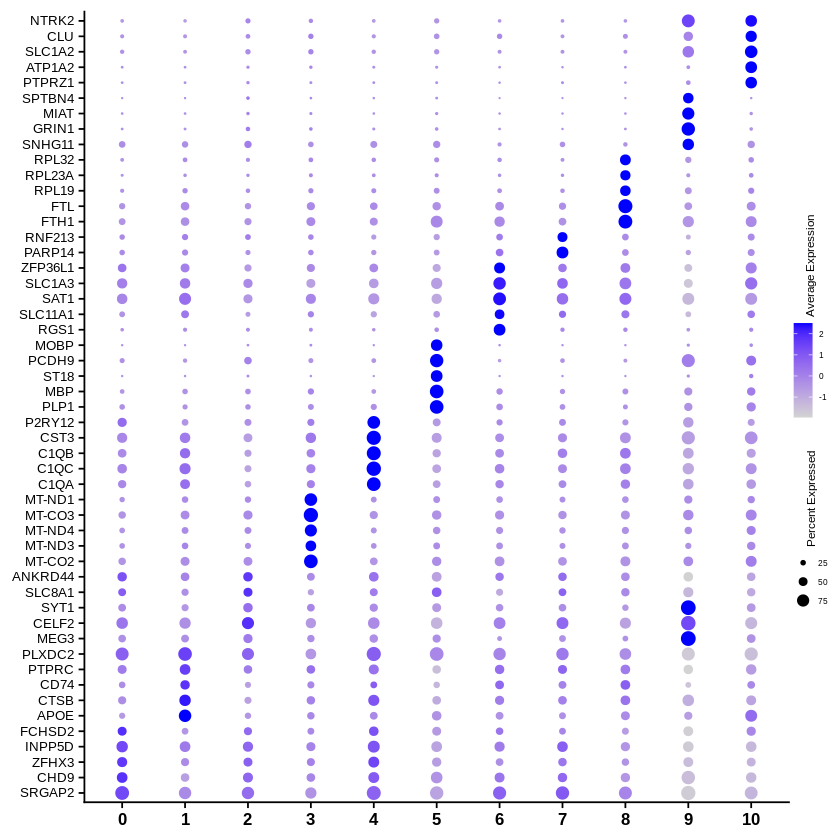

In [45]:
#detect and plot cell subpopulation proportion changes of each genotype
#visualize top5 to 10 marker genes in DopPlot
d2 <- by(marker_all, marker_all["cluster"], head, n=5)
d2<-as.matrix(d2)

d_sum2<-vector()
for (i in 1:length(d2)){
    d_temp<-as.character(d2[[i]]$gene)
    d_sum2<-append(d_sum2,d_temp)
}

d_sum2<-intersect(d_sum2,rownames(seu.integrated))

DotPlot(seu.integrated, features = d_sum2,
              dot.scale = 3.5
              #scale.by = "size"
             ) + coord_flip()+
theme(#strip.background = element_blank(),
    axis.title = element_blank(),
    axis.text.x = element_text(size = 10,hjust = 0.5, face = "bold"),
    axis.text.y = element_text(size = 8),
     legend.position = "right",
     #legend.spacing = unit(0, "mm"),
     legend.direction = "vertical",
        legend.text = element_text(size=5),
        legend.key.width = unit(4, "mm"),
        legend.key.height = unit(4, "mm"),
        legend.box.spacing = unit(1, "mm"),
        legend.margin = margin(2),
        legend.title = element_text(size = 7,angle = 90))

In [48]:
#very rough proportion analysis for DAM, prunning and myelin processing microglia
seu.integrated@meta.data$temp<-seu.integrated@meta.data$seurat_clusters

In [49]:
seu.integrated@meta.data$temp<-factor(seu.integrated@meta.data$temp,
                                     levels = c("0","2","3","6","7","8","9","10","1","4","5"),
                                     labels = c(rep("other microglia",8),
                                                "DAM", "Prunning","Myelin processing"))

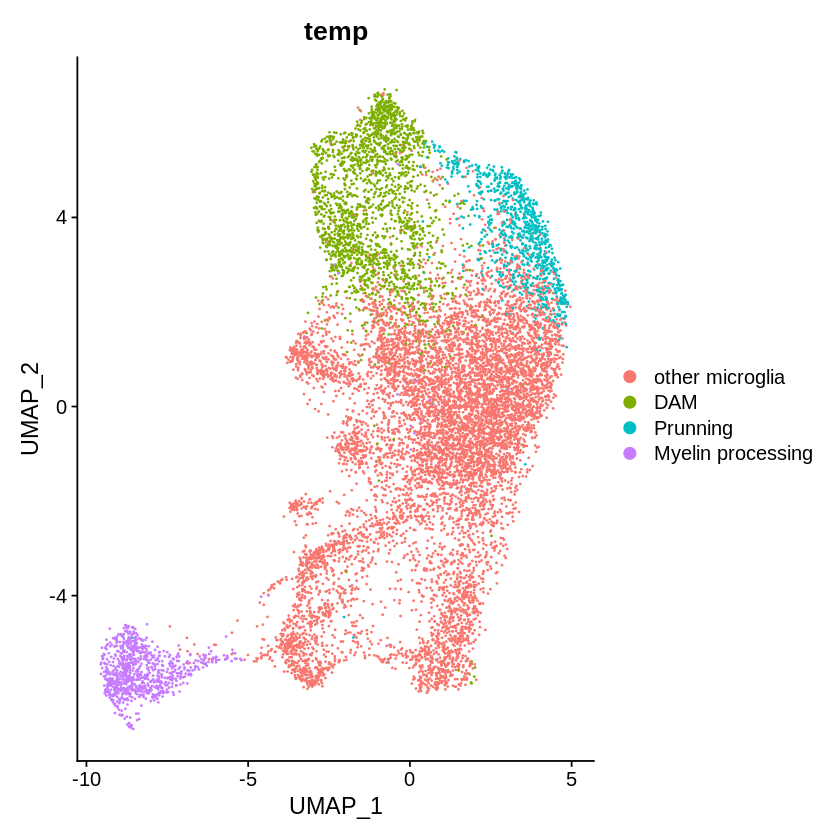

In [50]:
DimPlot(seu.integrated, group.by = "temp")

In [51]:
unique(seu.integrated@meta.data$Condition)

[1] "WT"              "CnpKO"           "Plp1KO"          "Foxg1MbpKO"     
 [5] "Trem2KO"         "5xFAD"           "Trem2KO_5xFAD"   "AD_Zhou2020"    
 [9] "Ctrl_Zhou2020"   "AD_TREM2_R62H"   "Ctrl_Mathys2019" "AD_Mathys2019"

In [52]:
#calculate subpopulation shift based on cluster
Idents(seu.integrated)<-"temp"

sep_pro<-as.data.frame(prop.table(table(seu.integrated@meta.data$temp,
                                             seu.integrated@meta.data$Condition), margin = 2))
head(sep_pro)

Var1              Var2          Freq      
1 other microglia   5xFAD         0.44123314
2 DAM               5xFAD         0.45536288
3 Prunning          5xFAD         0.06101477
4 Myelin processing 5xFAD         0.04238921
5 other microglia   AD_Mathys2019 0.69738220
6 DAM               AD_Mathys2019 0.19162304

In [53]:
colnames(sep_pro)<-c("CellType", "Condition", "Proportion")

In [54]:
unique(sep_pro$CellType)
unique(sep_pro$Condition)

[1] other microglia   DAM               Prunning          Myelin processing
Levels: other microglia DAM Prunning Myelin processing

[1] 5xFAD           AD_Mathys2019   AD_TREM2_R62H   AD_Zhou2020    
 [5] CnpKO           Ctrl_Mathys2019 Ctrl_Zhou2020   Foxg1MbpKO     
 [9] Plp1KO          Trem2KO         Trem2KO_5xFAD   WT             
12 Levels: 5xFAD AD_Mathys2019 AD_TREM2_R62H AD_Zhou2020 ... WT

In [55]:
color<-c("tomato","springgreen4","turquoise3","magenta")

In [56]:
sep_pro$Condition<-factor(sep_pro$Condition,
                         levels = c("WT","Ctrl_Mathys2019","Ctrl_Zhou2020","AD_Mathys2019","AD_Zhou2020",
                                    "AD_TREM2_R62H","5xFAD","Trem2KO_5xFAD","Trem2KO",
                                   "CnpKO","Plp1KO","Foxg1MbpKO"))

In [57]:
sep_pro2<-subset(sep_pro, subset = Condition %in% c("WT","Ctrl_Mathys2019","Ctrl_Zhou2020","AD_Mathys2019","AD_Zhou2020",
                                                    "AD_TREM2_R62H","5xFAD",
                                   "CnpKO","Plp1KO","Foxg1MbpKO"))

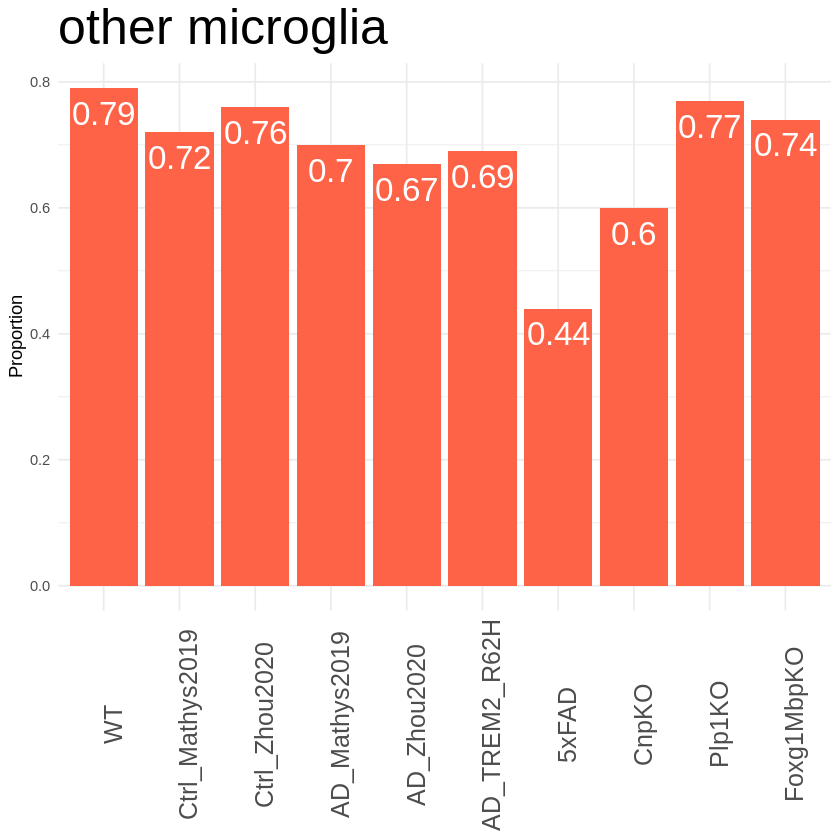

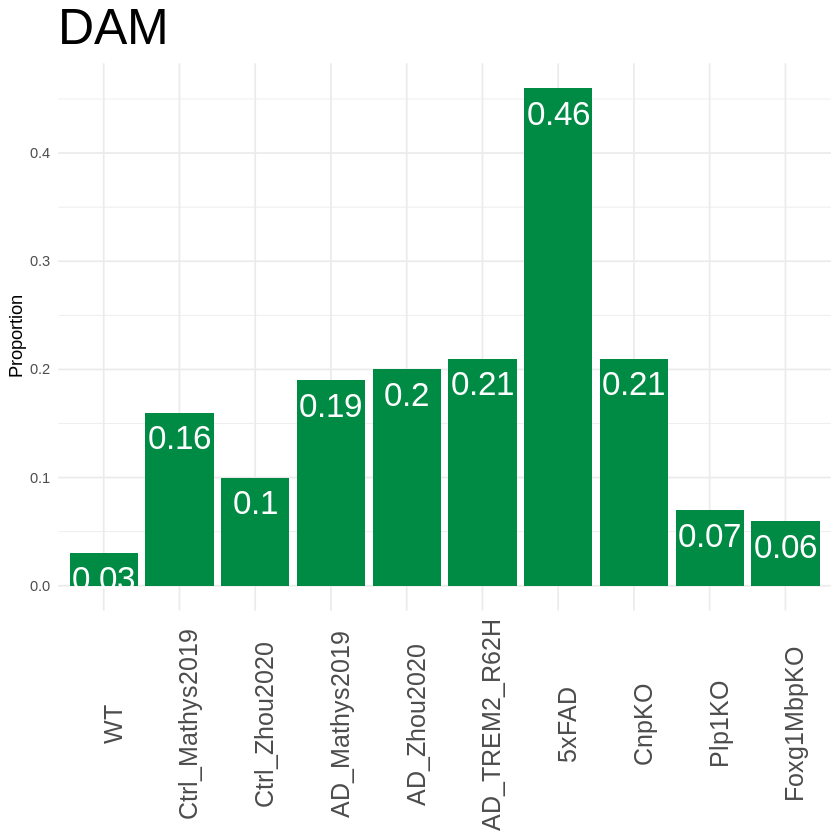

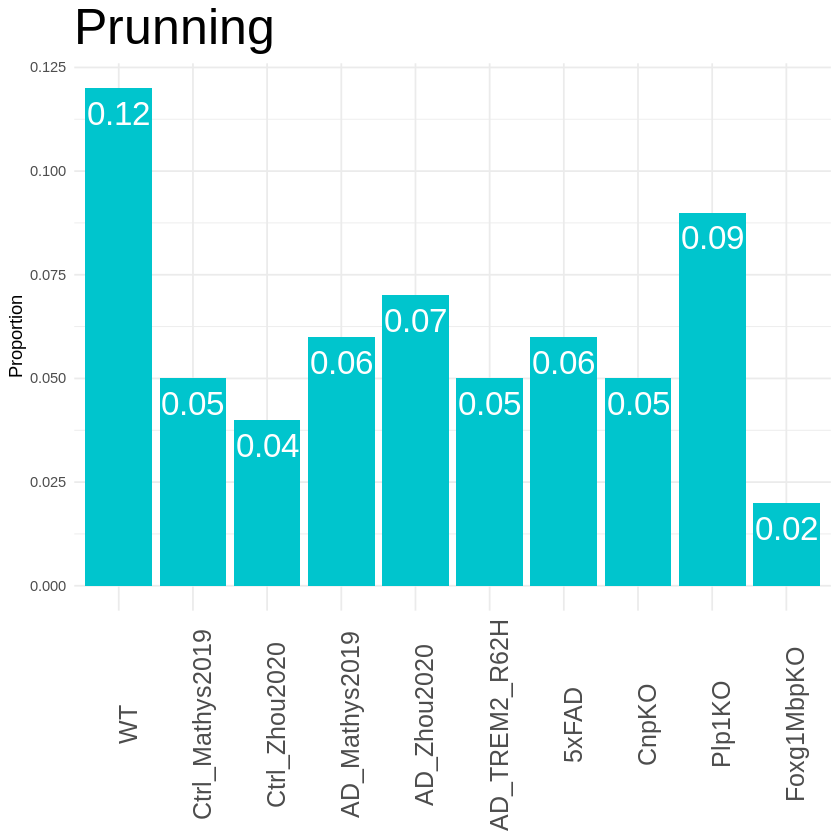

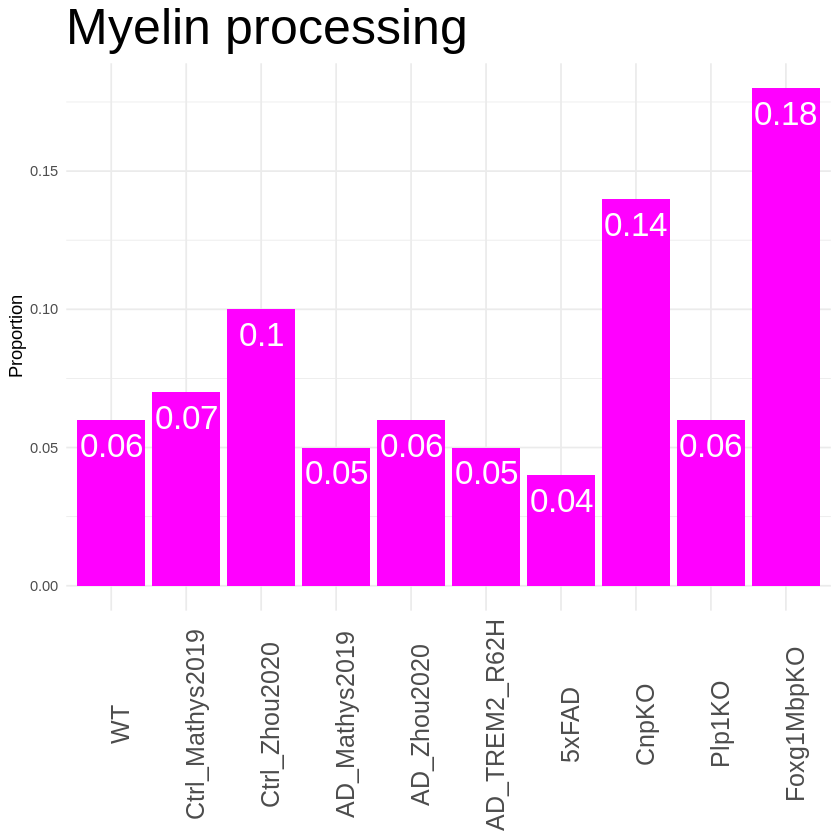

In [59]:
for(i in 1:4){
    test<-subset(sep_pro2,subset = CellType == unique(sep_pro$CellType)[i])
    test$Proportion<-round(test$Proportion,2)
    p<-ggplot(data=test, aes(x=Condition, y=Proportion)) +
              geom_bar(stat="identity", fill=color[i])+
              geom_text(aes(label=Proportion), vjust=1.6, color="white", size=7)+
              theme_minimal()+
            ggtitle(unique(sep_pro$CellType)[i])+
    theme(plot.title = element_text(size=30),
         axis.text.x = element_text(size = 15,hjust = 0.5, angle = 90),
         axis.title.x = element_blank())
    print(p)
}

In [ ]:
########################color code matched with manuscript

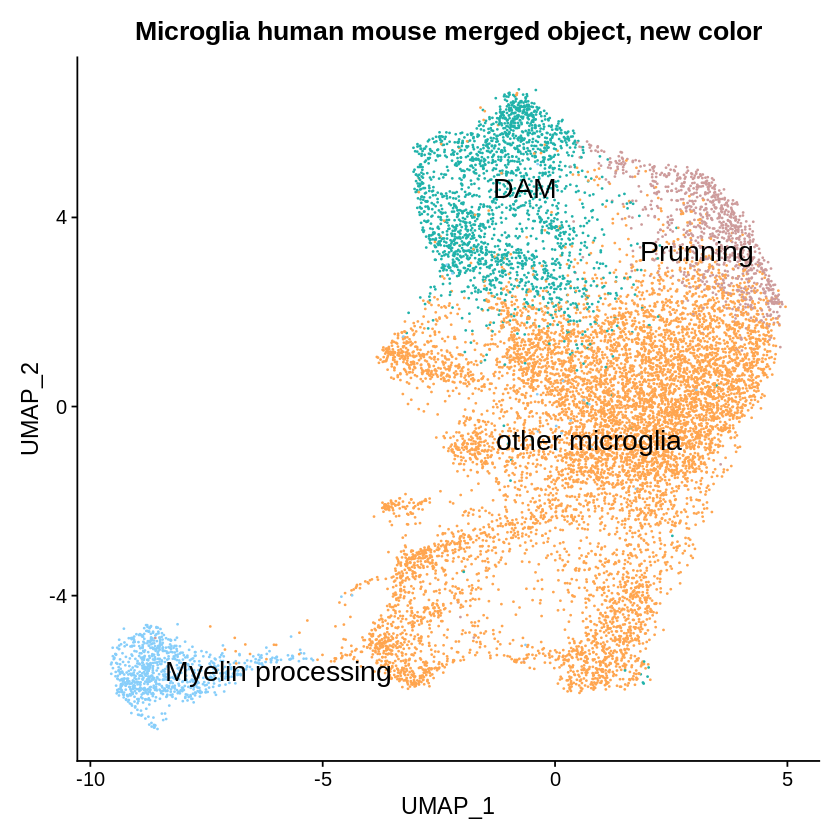

In [16]:
(plt<-DimPlot(seu.integrated, group.by = "temp", label = T, label.size = 6, repel = T,
       cols = c("tan1","lightseagreen","rosybrown3","lightskyblue"))+
NoLegend()+
ggtitle("Microglia human mouse merged object, new color"))

In [ ]:
#highlight genotype with manuscript matched color
color<-c("#5445b1", "#749dae", "#cd3341",
         "#5c1a33","#f3c483",  "#4DA896", "#E07882","#f7dc6a")

sample_names<-c("WT","CnpKO","5xFAD",
                "AD_Zhou2020","Ctrl_Zhou2020",
                "AD_Mathys2019","Ctrl_Mathys2019")

sampleID_list<-vector(mode = "list", length = 7)

Idents(seu.integrated)<-"Condition"

for(i in 1:7){
    sampleID_list[[i]]<-WhichCells(seu.integrated, idents = sample_names[i])
}

for (k in 1:7){
        print(DimPlot(seu.integrated, label=F, group.by="Condition", 
        cells.highlight= sampleID_list[[k]])+ 
              scale_color_manual(labels = c("Other Conditions", as.character(sample_names[k])), 
                                 values = c("grey", color[k])) +
              labs(color = "legend title"))
    }